# Estimación y predicción de potencia de panel fotovoltaico
### Elaborada por Fernando Jacome

# Lectura de archivo CSV

In [74]:
import numpy as np
import scipy.io
import pandas as pd
Pred_DAS = pd.read_csv(r'G:\files\Predictores_DAS.csv')
Pred_C3S = pd.read_csv(r'G:\files\Predictores_C3S.csv')
Targ_DAS = pd.read_csv(r'G:\files\Target_DAS.csv')
Targ_C3S = pd.read_csv(r'G:\files\Target_C3S.csv')
Pred_C3S.head() # to display the first 5 lines of loaded data

Predictores_C3S = Pred_C3S.to_numpy()
Target_C3S = Targ_C3S.to_numpy()



# Definición de los modelos de Machine Learning a utilizar

In [75]:
import numpy as np

#Librería para algoritmo Random Forest
from sklearn.ensemble import RandomForestRegressor

#Librería para algoritmo SVR
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

#Librerías para algoritmo MLP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

#Estandarización y división en conjuntos de train y test
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split


class regressor_ml():
    def __init__(self) -> None:
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.X = None
        self.y = None
    def std(self):  #Estandarización de X_train y X_test
        scaler = StandardScaler()
        scaler.fit(self.X_train)
        self.X_train = scaler.transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

    def rf(self, n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True):
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, bootstrap=bootstrap)
        self.model.fit(self.X_train, self.y_train)
        self.model.score(self.X_test, self.y_test)

    def svr(self, kernel='rbf', C=1.0, epsilon=0.1, gamma='scale'):
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)
        self.model.fit(self.X_train, self.y_train)
        self.model.score(self.X_test, self.y_test)
    
    def mlp(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def rnn(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(SimpleRNN (units =5, activation ="tanh", input_shape = (self.X_train.shape[1], 1)))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(16, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1, activation='linear'))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def lstm(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(LSTM(100, activation='relu', input_shape=(self.X_train.shape[1], 1)))
        # self.model.add(Dropout(Dropout_rate))
        # self.model.add(LSTM(50, activation='relu'))
        # self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def slstm(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(self.X_train.shape[1], 1)))
        #self.model.add(Dropout(Dropout_rate))
        self.model.add(LSTM(50, activation='relu'))
        #self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)
        
    def bilstm(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(self.X_train.shape[1], 1))))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(LSTM(50, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def cnn(self, batch_size=32, epochs=500, verbose=True, Dropout_rate=0.2, lr=0.001, loss='mean_squared_error'):
        self.model = Sequential()
        self.model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(self.X_train.shape[1], 1)))
        self.model.add(MaxPooling1D(pool_size=2))
        self.model.add(Flatten())
        self.model.add(Dense(100, activation='relu'))
        self.model.add(Dropout(Dropout_rate))
        self.model.add(Dense(1))
        self.model.compile(optimizer=Adam(learning_rate=lr), loss=loss)
        self.model.fit(x=self.X_train, y=self.y_train, validation_data=(self.X_test, self.y_test), batch_size=batch_size, epochs=epochs, verbose=verbose)

    def prediction(self):
        self.y_pred = self.model.predict(self.X_test)
        return self.y_pred
        


# Obtención de los conjuntos de entrenamiento y test, y estandarización de X_train y X_test

### Para ello dedicaremos el 80% de las muestras para el conjunto de entrenamiento, y el 20% restante para el conjunto de test. 

In [76]:
reg = regressor_ml()

# Dividimos el conjunto de datos (predictores y target) en conjuntos de train y test, dedicando un 80% al conjunto de entrenamiento, y un 20% al conjunto de test. 

reg.X_train, reg.X_test, reg.y_train, reg.y_test = train_test_split(Predictores_C3S, Target_C3S , test_size= 0.2 , shuffle= False )
X_train = reg.X_train
X_test = reg.X_test
y_train = reg.y_train
y_test = reg.y_test



#Estandarización de las muestras de entrada de train y test

reg.std()


X_train_std = reg.X_train
X_test_std = reg.X_test
y_train_std = reg.y_train
y_test_std = reg.y_test

# Busqueda aleatoria de los parametros del modelo RF

In [77]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.utils.fixes import loguniform
from time import time
import numpy as np

rf_regressor = RandomForestRegressor()


def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

n_iter_search = 10
# Create hyperparameter space
param_dist = {'n_estimators': np.round(loguniform.rvs(1, 1000, size=n_iter_search)).astype(int),
 'max_depth': np.round(loguniform.rvs(1, 10, size=n_iter_search)).astype(int),
 'min_samples_split': np.round(loguniform.rvs(1, 10, size=n_iter_search)).astype(int),
 'min_samples_leaf': np.round(loguniform.rvs(1, 10, size=n_iter_search)).astype(int),
 'max_features': ['sqrt','log2', 1.0]}

# run randomized search

random_search_rf = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=n_iter_search #,scoring='neg_mean_absolute_error'
)
start = time()
random_search_rf.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."% ((time() - start), n_iter_search))
report(random_search_rf.cv_results_)

c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\F

c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\F

RandomizedSearchCV took 5.08 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.708 (std: 0.309)
Parameters: {'n_estimators': 149, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 4}

Model with rank: 2
Mean validation score: 0.708 (std: 0.325)
Parameters: {'n_estimators': 124, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 3}

Model with rank: 3
Mean validation score: 0.704 (std: 0.321)
Parameters: {'n_estimators': 22, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 3}



In [78]:
random_search_rf.best_params_

{'n_estimators': 149,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 4}

# Predicciones con los diferentes modelos: Modelo Random Forest

### Llamada de los diferentes algoritmos de regresión. 

In [79]:

#Predicciones con los diferentes modelos

reg.rf(n_estimators=random_search_rf.best_params_['n_estimators'], max_depth=random_search_rf.best_params_['max_depth'], min_samples_split=random_search_rf.best_params_['min_samples_split'],
        min_samples_leaf=random_search_rf.best_params_['min_samples_leaf'], max_features=random_search_rf.best_params_['max_features'], bootstrap=True) # Random Forest
y_pred_rf = reg.prediction()         # Predicción con Random Forest

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes

y_pred_rf[y_pred_rf < 0] = 0
y_pred_rf = y_pred_rf.flatten()

C:\Users\Fernando Jacome\AppData\Local\Temp\ipykernel_2160\2237974888.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(self.X_train, self.y_train)


# Obtención de las métricas, Scatter plot y grafico temporal para Random Forest

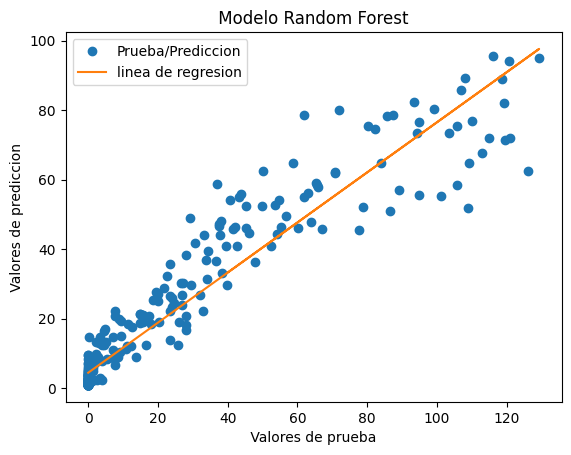

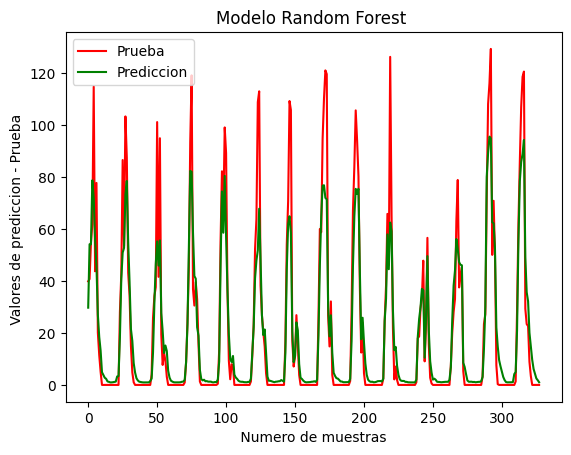

In [80]:
from sklearn import metrics
import matplotlib.pyplot as plt

## Metrics

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}

MAE_RF = mtrc['MAE'](y_test, y_pred_rf)

MSE_RF = mtrc['MSE'](y_test, y_pred_rf)

r2_RF = mtrc['r2'](y_test, y_pred_rf)



## Scatter plots y predicción temporal

## RF
#Sscatterplot
plt.plot(y_test, y_pred_rf , 'o') # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_rf, 1)
#La siguiente línea de código se añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo Random Forest ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)              
plt.show()


#Predicción temporal
plt.plot(y_test,c='r')
plt.plot(y_pred_rf,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title('Modelo Random Forest ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()

In [81]:
print(f'MAE: {MAE_RF}')
print(f'MSE: {MSE_RF}')
print(f'r2: {r2_RF}')

MAE: 6.533998661262145
MSE: 143.5949606215798
r2: 0.867792193309017


# Busqueda aleatoria de los parametros del modelo SVR

In [82]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.utils.fixes import loguniform
from time import time

svr_regressor = SVR()


def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")



# Create hyperparameter space
param_dist = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'epsilon': loguniform(1e-2, 1e-1),
 'kernel': ['rbf', 'sigmoid']}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(
    svr_regressor, param_distributions=param_dist, n_iter=n_iter_search #,scoring='neg_mean_absolute_error'
)
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."% ((time() - start), n_iter_search))
report(random_search.cv_results_)

c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages

RandomizedSearchCV took 3.46 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.725 (std: 0.335)
Parameters: {'C': 11.145764338019944, 'epsilon': 0.01776391752744419, 'gamma': 0.0001483956238288916, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.710 (std: 0.307)
Parameters: {'C': 2.1843990915064997, 'epsilon': 0.018728469737517697, 'gamma': 0.00013078585914557544, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.706 (std: 0.396)
Parameters: {'C': 560.2880330337067, 'epsilon': 0.02125095331528949, 'gamma': 0.0001113706838947018, 'kernel': 'rbf'}



c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
random_search.best_params_

{'C': 11.145764338019944,
 'epsilon': 0.01776391752744419,
 'gamma': 0.0001483956238288916,
 'kernel': 'rbf'}

# Predicciones con los diferentes modelos: SVR

In [84]:
#Predicciones con los diferentes modelos
reg.svr(kernel=random_search.best_params_['kernel'], C=random_search.best_params_['C'], epsilon=random_search.best_params_['epsilon'], gamma=random_search.best_params_['gamma'])                # Support Vector Machine for Regression
y_pred_svr = reg.prediction()          #  Predicción con Support Vector Machine for Regression

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes

y_pred_svr[y_pred_svr < 0] = 0
y_pred_svr = y_pred_svr.flatten()

c:\Users\Fernando Jacome\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Obtención de las métricas, Scatter plot y grafico temporal para SVR
Las métricas seran: MAE, MSE y r^2

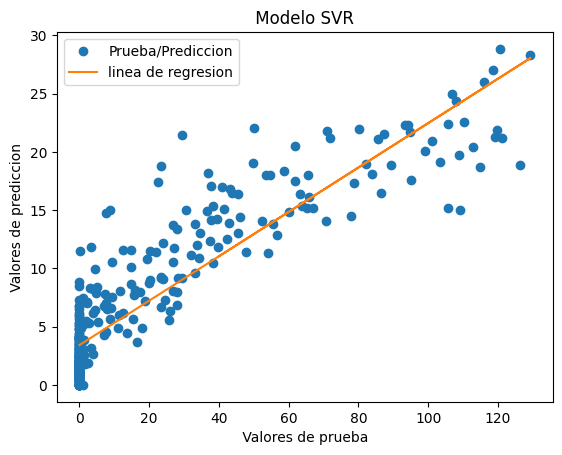

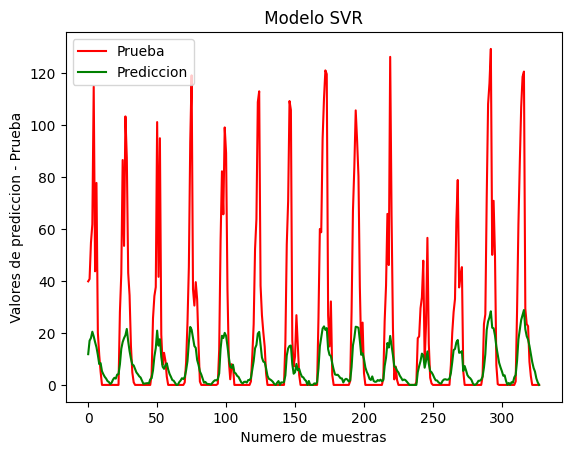

In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}

MAE_SVR = mtrc['MAE'](reg.y_test, y_pred_svr)

MSE_SVR = mtrc['MSE'](reg.y_test, y_pred_svr)

r2_SVR = mtrc['r2'](reg.y_test, y_pred_svr)

## Scatter plots y predicción temporal

## SVR
#Sscatterplot
plt.plot( y_test, y_pred_svr , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_svr, 1)
#La siguiente línea de código se añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo SVR ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)                
plt.show()

#Predicción temporal
plt.plot(y_test,c='r')
plt.plot(y_pred_svr,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba ') 
plt.title(' Modelo SVR ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)                  
plt.show()

In [86]:
print(f'MAE: {MAE_SVR}')
print(f'MSE: {MSE_SVR}')
print(f'r2: {r2_SVR}')

MAE: 15.92158664278139
MSE: 892.7095246190974
r2: 0.17808279795367565


In [87]:
# Carga de la extension para tensordoard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Busqueda de hyperparametros con el modelo: MPL

In [88]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime, os

def build_regressor_mpl(hp):
    model = keras.Sequential()
    model.add(layers.Input(X_train_std.shape[1], 1)) 
     # Se escoge el numero de capas
    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()],
    )
    return model


build_regressor_mpl(keras_tuner.HyperParameters())

tuner_mpl = keras_tuner.RandomSearch(
    hypermodel=build_regressor_mpl,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="CS3_dir_mpl",
    project_name="CS3_mpl_training",
)

tensorboard_callback = tf.keras.callbacks.TensorBoard("/CS3/mpl/tb_logs", histogram_freq=1)

tuner_mpl.search(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), batch_size=32, epochs=100, verbose=True, callbacks=[keras.callbacks.TensorBoard("/C3S/mpl/tb_logs")] )

tuner_mpl.search_space_summary()






Trial 3 Complete [00h 01m 02s]
val_mean_absolute_error: 5.199122428894043

Best val_mean_absolute_error So Far: 5.199122428894043
Total elapsed time: 00h 02m 43s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'li

In [89]:
tuner_mpl.results_summary()


Results summary
Results in CS3_dir_mpl\CS3_mpl_training
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 8
units_0: 288
activation: tanh
dropout: False
lr: 0.006419650235738946
units_1: 96
units_2: 320
units_3: 448
units_4: 192
units_5: 448
units_6: 128
units_7: 512
Score: 5.199122428894043

Trial 1 summary
Hyperparameters:
num_layers: 7
units_0: 224
activation: tanh
dropout: True
lr: 0.009493934795032574
units_1: 480
units_2: 32
units_3: 352
units_4: 416
units_5: 288
units_6: 192
units_7: 160
Score: 5.9299280643463135

Trial 0 summary
Hyperparameters:
num_layers: 8
units_0: 224
activation: tanh
dropout: False
lr: 0.006091359237918639
units_1: 32
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 6.183419466018677


In [90]:
# Se obtiene los 2 mejores modelos encontrados
models_mpl = tuner_mpl.get_best_models(num_models=2)
best_model_mpl = models_mpl[0]
# Ejecuta el modelo
best_model_mpl.build(input_shape=(None, 28, 28))
best_model_mpl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 288)                  2592      
                                                                 
 dense_1 (Dense)             (1, 96)                   27744     
                                                                 
 dense_2 (Dense)             (1, 320)                  31040     
                                                                 
 dense_3 (Dense)             (1, 448)                  143808    
                                                                 
 dense_4 (Dense)             (1, 192)                  86208     
                                                                 
 dense_5 (Dense)             (1, 448)                  86464     
                                                                 
 dense_6 (Dense)             (1, 128)                  5

In [91]:
%tensorboard --logdir "/CS3/mpl/tb_logs"

Reusing TensorBoard on port 6006 (pid 8648), started 0:18:16 ago. (Use '!kill 8648' to kill it.)

# Predicciones con el mejor modelo encontrado: MLP clasica

In [92]:
y_pred_mlp = best_model_mpl.predict(X_test_std)
y_pred_mlp[y_pred_mlp < 0] = 0 

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes
y_pred_mlp = y_pred_mlp.flatten()

11/11 [==============================] - 0s 3ms/step


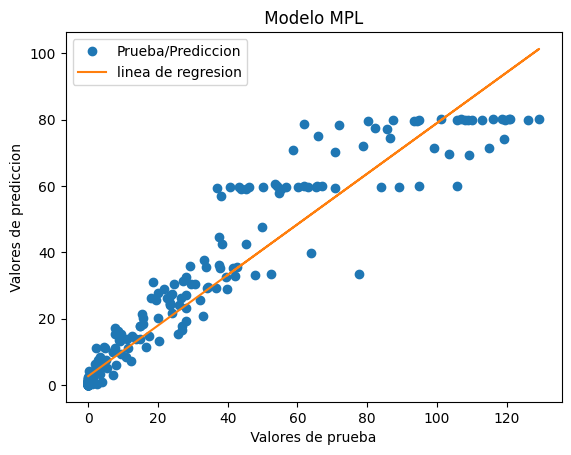

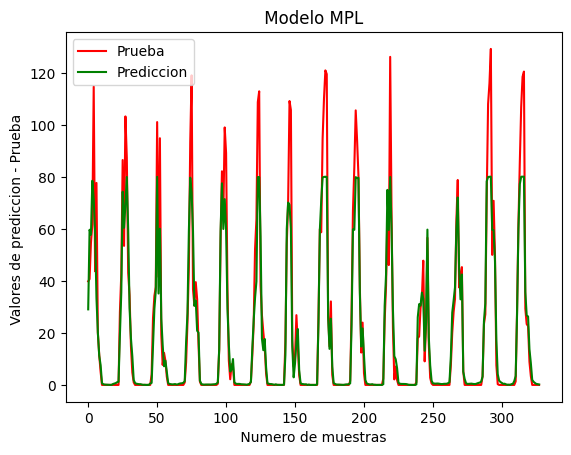

In [93]:
# Obtención de las métricas, Scatter plot y grafico temporal para MPL
# Las métricas seran: MAE, MSE y r^2
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}


MAE_MLP = mtrc['MAE'](y_test, y_pred_mlp)

MSE_MLP = mtrc['MSE'](y_test, y_pred_mlp)

r2_MLP = mtrc['r2'](y_test, y_pred_mlp)


## MLP
#Sscatterplot
plt.plot( y_test, y_pred_mlp , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_mlp, 1)
#La siguiente línea de código añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo MPL ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)         
plt.show()

#Predicción temporal
plt.plot(y_test ,c='r')
plt.plot(y_pred_mlp ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo MPL ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()



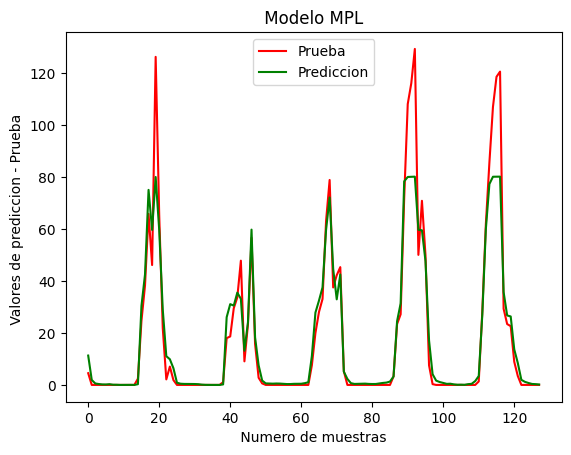

In [94]:
y_test_par = y_test[200:1400]
y_pred_mlp_par = y_pred_mlp[200:1400]


#Predicción temporal
plt.plot(y_test_par ,c='r')
plt.plot(y_pred_mlp_par ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo MPL ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()


In [95]:
print(f'MAE: {MAE_MLP}')
print(f'MSE: {MSE_MLP}')
print(f'r2: {r2_MLP}')

MAE: 5.144631358017538
MSE: 120.67603463853642
r2: 0.888893636721898


# Busqueda de hyperparametros con el modelo: RNN

In [96]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime, os

def build_regressor_rnn(hp):
    model = keras.Sequential()
    #model.add(layers.Input(X_train_std.shape[1], 1)) 

    # Se escoge el numero de capas
    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.SimpleRNN(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                input_shape = (X_train_std.shape[1], 1)
            )
        )

    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1))
  
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()],
    )
    return model


build_regressor_rnn(keras_tuner.HyperParameters())

tuner_rnn = keras_tuner.RandomSearch(
    hypermodel=build_regressor_rnn,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="CS3_dir_rnn",
    project_name="CS3_rnn_training",
)

tensorboard_callback = tf.keras.callbacks.TensorBoard("/CS3/rnn/tb_logs", histogram_freq=1)

tuner_rnn.search(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), batch_size=32, epochs=100, verbose=True, callbacks=[keras.callbacks.TensorBoard("/CS3/rnn/tb_logs")] )

tuner_rnn.search_space_summary()






Trial 3 Complete [00h 01m 25s]
val_mean_absolute_error: 4.858804702758789

Best val_mean_absolute_error So Far: 4.858804702758789
Total elapsed time: 00h 03m 22s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [97]:
tuner_rnn.results_summary()


Results summary
Results in CS3_dir_rnn\CS3_rnn_training
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 1
units_0: 320
activation: relu
dropout: True
lr: 0.003872084305659864
Score: 4.858804702758789

Trial 1 summary
Hyperparameters:
num_layers: 1
units_0: 224
activation: tanh
dropout: True
lr: 0.002907389302816031
Score: 5.052737236022949

Trial 0 summary
Hyperparameters:
num_layers: 1
units_0: 128
activation: tanh
dropout: True
lr: 0.000896642908951089
Score: 5.48912239074707


In [98]:
# Se obtiene los 2 mejores modelos encontrados
models_rnn = tuner_rnn.get_best_models(num_models=2)
best_model_rnn = models_rnn[0]
# Ejecuta el modelo
best_model_rnn.build(input_shape=(None, 28, 28))
best_model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 320)               103040    
                                                                 
 dense (Dense)               (None, 320)               102720    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 321       
                                                                 
Total params: 206,081
Trainable params: 206,081
Non-trainable params: 0
_________________________________________________________________


In [99]:
%tensorboard --logdir "/CS3/rnn/tb_logs"

# Predicciones con el mejor modelo encontrado: Recurrent NN

In [100]:
y_pred_rnn = best_model_rnn.predict(X_test_std)
y_pred_rnn[y_pred_rnn < 0] = 0 

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes
y_pred_rnn = y_pred_rnn.flatten()

11/11 [==============================] - 0s 4ms/step


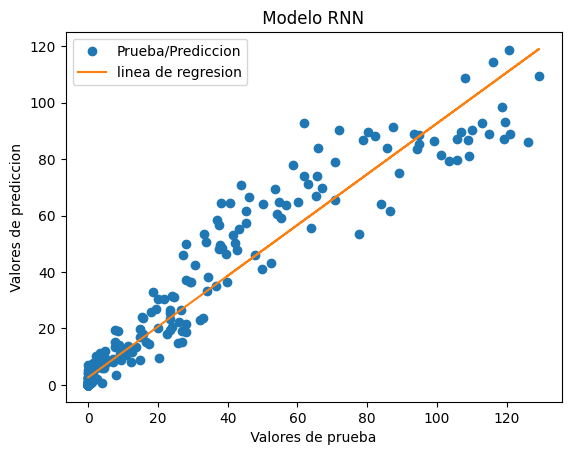

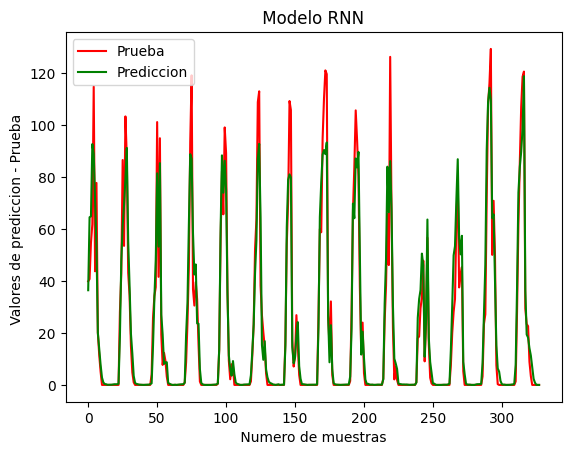

In [101]:
# Obtención de las métricas, Scatter plot y grafico temporal para MPL
# Las métricas seran: MAE, MSE y r^2
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}


MAE_RNN = mtrc['MAE'](y_test, y_pred_rnn)

MSE_RNN = mtrc['MSE'](y_test, y_pred_rnn)

r2_RNN = mtrc['r2'](y_test, y_pred_rnn)


## rnn
#Sscatterplot
plt.plot( y_test, y_pred_rnn , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_rnn, 1)
#La siguiente línea de código añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo RNN ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)         
plt.show()

#Predicción temporal
plt.plot(y_test ,c='r')
plt.plot(y_pred_rnn ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo RNN ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()



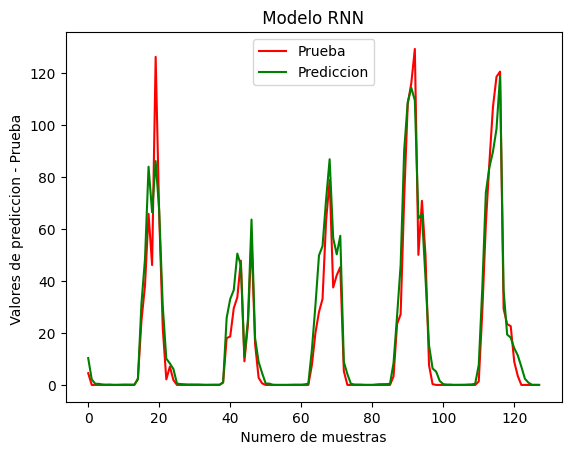

In [102]:
y_test_par = y_test[200:1400]
y_pred_rnn_par = y_pred_rnn[200:1400]


#Predicción temporal
plt.plot(y_test_par ,c='r')
plt.plot(y_pred_rnn_par ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo RNN ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()


In [103]:
print(f'MAE: {MAE_RNN}')
print(f'MSE: {MSE_RNN}')
print(f'r2: {r2_RNN}')

MAE: 4.7595529712696685
MSE: 75.97395643956379
r2: 0.9300508172220527


# Predicciones con los diferentes modelos: Long Short Term Memory

# Busqueda de hyperparametros con el modelo: LSTM

In [104]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime, os

def build_regressor_lstm(hp):
    model = keras.Sequential()
    #model.add(layers.Input(X_train_std.shape[1], 1)) 

    # Se escoge el numero de capas
    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.LSTM(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                input_shape = (X_train_std.shape[1], 1)
            )
        )

    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1))
  
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()],
    )
    return model


build_regressor_lstm(keras_tuner.HyperParameters())

tuner_lstm = keras_tuner.RandomSearch(
    hypermodel=build_regressor_lstm,
    objective="val_mean_absolute_error",
    max_trials=2,
    executions_per_trial=2,
    overwrite=True,
    directory="CS3_dir_lstm",
    project_name="CS3_lstm_training",
)

tensorboard_callback = tf.keras.callbacks.TensorBoard("/CS3/lstm/tb_logs", histogram_freq=1)

tuner_lstm.search(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), batch_size=32, epochs=100, verbose=True, callbacks=[keras.callbacks.TensorBoard("/CS3/lstm/tb_logs")] )

tuner_lstm.search_space_summary()






Trial 2 Complete [00h 01m 58s]
val_mean_absolute_error: 5.226419925689697

Best val_mean_absolute_error So Far: 5.226419925689697
Total elapsed time: 00h 07m 25s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [105]:
tuner_lstm.results_summary()


Results summary
Results in CS3_dir_lstm\CS3_lstm_training
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 1 summary
Hyperparameters:
num_layers: 1
units_0: 224
activation: tanh
dropout: True
lr: 0.00025612335748235267
Score: 5.226419925689697

Trial 0 summary
Hyperparameters:
num_layers: 1
units_0: 384
activation: relu
dropout: True
lr: 0.001305134921785015
Score: 5.242900609970093


In [106]:
# Se obtiene los 2 mejores modelos encontrados
models_lstm = tuner_lstm.get_best_models(num_models=2)
best_model_lstm = models_lstm[0]
# Ejecuta el modelo
best_model_lstm.build(input_shape=(None, 28, 28))
best_model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 224)               202496    
                                                                 
 dense (Dense)               (None, 224)               50400     
                                                                 
 dropout (Dropout)           (None, 224)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 225       
                                                                 
Total params: 253,121
Trainable params: 253,121
Non-trainable params: 0
_________________________________________________________________


In [107]:
%tensorboard --logdir "/CS3/lstm/tb_logs"

# Predicciones con el mejor modelo encontrado: Long Short Memory NN

In [108]:
y_pred_lstm = best_model_lstm.predict(X_test_std)
y_pred_lstm[y_pred_lstm < 0] = 0 

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes
y_pred_lstm = y_pred_lstm.flatten()

11/11 [==============================] - 0s 6ms/step


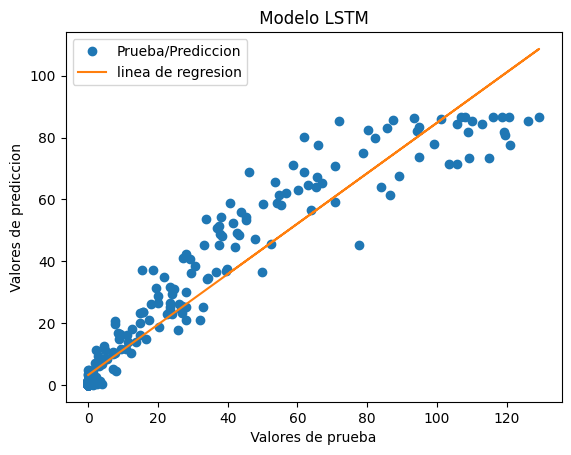

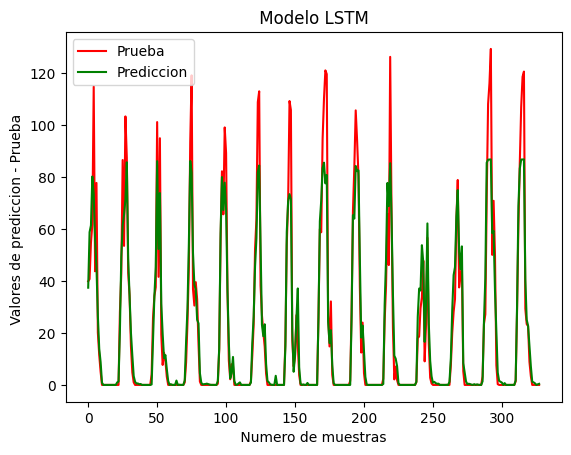

In [109]:
# Obtención de las métricas, Scatter plot y grafico temporal para MPL
# Las métricas seran: MAE, MSE y r^2
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}


MAE_LSTM = mtrc['MAE'](y_test, y_pred_lstm)

MSE_LSTM = mtrc['MSE'](y_test, y_pred_lstm)

r2_LSTM = mtrc['r2'](y_test, y_pred_lstm)


## rnn
#Sscatterplot
plt.plot( y_test, y_pred_lstm , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_lstm, 1)
#La siguiente línea de código añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo LSTM ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)         
plt.show()

#Predicción temporal
plt.plot(y_test ,c='r')
plt.plot(y_pred_lstm ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo LSTM ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()



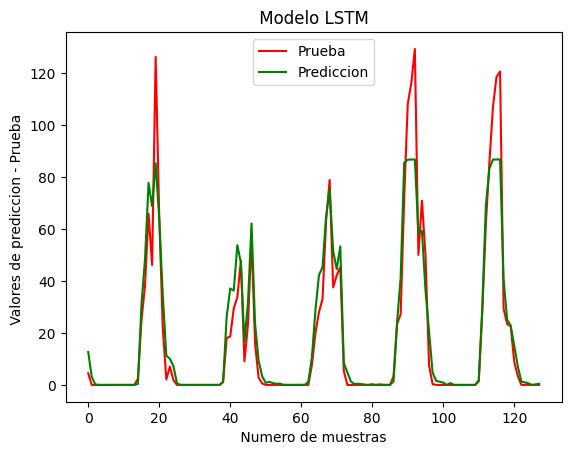

In [110]:
y_test_par = y_test[200:1400]
y_pred_lstm_par = y_pred_lstm[200:1400]


#Predicción temporal
plt.plot(y_test_par ,c='r')
plt.plot(y_pred_lstm_par ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo LSTM ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()


In [111]:
print(f'MAE: {MAE_LSTM}')
print(f'MSE: {MSE_LSTM}')
print(f'r2: {r2_LSTM}')

MAE: 4.9237252936742575
MSE: 98.22191394063634
r2: 0.9095671341468338


# Predicciones con los diferentes modelos: Stacked Long Short Term Memory

# Busqueda de hyperparametros con el modelo: SLSTM

In [112]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime, os

def build_regressor_slstm(hp):
    model = keras.Sequential()

    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.LSTM(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                return_sequences=True,
                input_shape = (X_train_std.shape[1], 1)
            )
        )

    #model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train_std.shape[1], 1)))

    # Se escoge el numero de capas
    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.LSTM(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                return_sequences=True
            )
        )

    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1))
  
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()],
    )
    return model


build_regressor_slstm(keras_tuner.HyperParameters())

tuner_slstm = keras_tuner.RandomSearch(
    hypermodel=build_regressor_slstm,
    objective="val_mean_absolute_error",
    max_trials=2,
    executions_per_trial=2,
    overwrite=True,
    directory="CS3_dir_slstm",
    project_name="CS3_slstm_training",
)

tensorboard_callback = tf.keras.callbacks.TensorBoard("/CS3/slstm/tb_logs", histogram_freq=1)

tuner_slstm.search(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), batch_size=32, epochs=100, verbose=True, callbacks=[keras.callbacks.TensorBoard("/CS3/slstm/tb_logs")] )

tuner_slstm.search_space_summary()






Trial 2 Complete [00h 04m 46s]
val_mean_absolute_error: 5.076386213302612

Best val_mean_absolute_error So Far: 4.992869853973389
Total elapsed time: 00h 11m 59s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [113]:
tuner_slstm.results_summary()


Results summary
Results in CS3_dir_slstm\CS3_slstm_training
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 1
units_0: 256
activation: tanh
dropout: False
lr: 0.00022870316973518678
Score: 4.992869853973389

Trial 1 summary
Hyperparameters:
num_layers: 1
units_0: 224
activation: tanh
dropout: False
lr: 0.0033907407069699042
Score: 5.076386213302612


In [114]:
# Se obtiene los 2 mejores modelos encontrados
models_slstm = tuner_slstm.get_best_models(num_models=2)
best_model_slstm = models_slstm[0]
# Ejecuta el modelo
best_model_slstm.build(input_shape=(None, 28, 28))
best_model_slstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 8, 256)            525312    
                                                                 
 dense (Dense)               (None, 8, 256)            65792     
                                                                 
 dense_1 (Dense)             (None, 8, 1)              257       
                                                                 
Total params: 855,553
Trainable params: 855,553
Non-trainable params: 0
_________________________________________________________________


In [115]:
%tensorboard --logdir "/CS3/slstm/tb_logs"

# Predicciones con el mejor modelo encontrado: Stacked Long Short Memory NN

In [116]:
y_pred_slstm = best_model_slstm.predict(X_test_std)
y_pred_slstm[y_pred_slstm < 0] = 0 

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes
y_pred_slstm = y_pred_slstm[:,0,0].flatten()

11/11 [==============================] - 1s 19ms/step


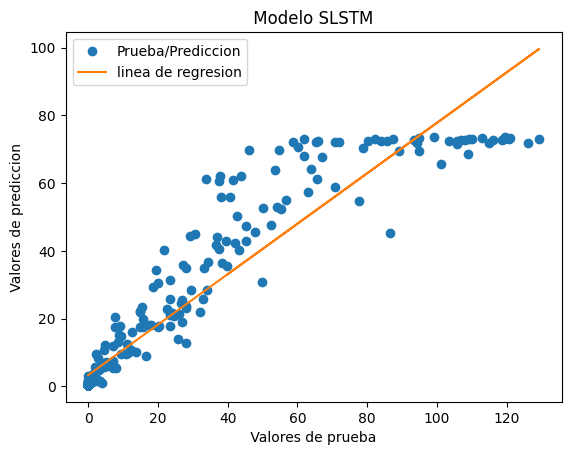

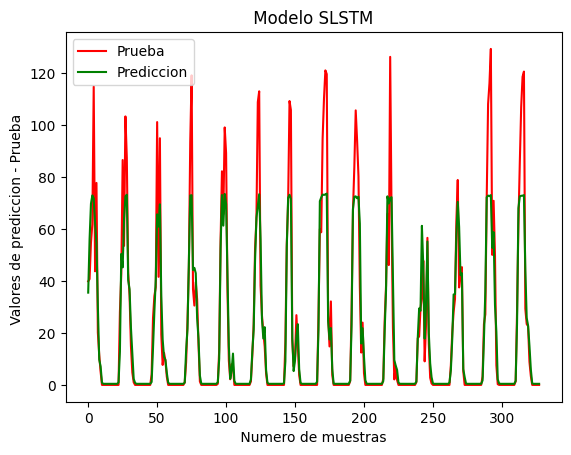

In [117]:
# Obtención de las métricas, Scatter plot y grafico temporal para MPL
# Las métricas seran: MAE, MSE y r^2
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}


MAE_SLSTM = mtrc['MAE'](y_test, y_pred_slstm)

MSE_SLSTM = mtrc['MSE'](y_test, y_pred_slstm)

r2_SLSTM = mtrc['r2'](y_test, y_pred_slstm)


## rnn
#Sscatterplot
plt.plot( y_test, y_pred_slstm , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_slstm, 1)
#La siguiente línea de código añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo SLSTM ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)         
plt.show()

#Predicción temporal
plt.plot(y_test ,c='r')
plt.plot(y_pred_slstm ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo SLSTM ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()



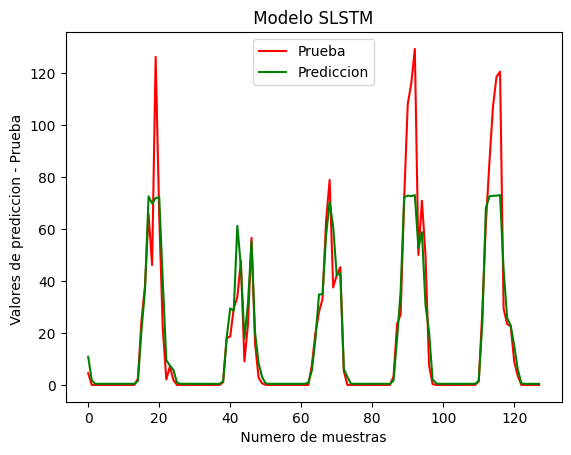

In [118]:
y_test_par = y_test[200:1400]
y_pred_slstm_par = y_pred_slstm[200:1400]


#Predicción temporal
plt.plot(y_test_par ,c='r')
plt.plot(y_pred_slstm_par ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo SLSTM ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()


In [119]:
print(f'MAE: {MAE_SLSTM}')
print(f'MSE: {MSE_SLSTM}')
print(f'r2: {r2_SLSTM}')

MAE: 5.682180277185242
MSE: 146.7557718138305
r2: 0.8648820360633666


# Predicciones con los diferentes modelos: Convolucional NN

# Busqueda de hyperparametros con el modelo: CNN

In [120]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime, os

def build_regressor_cnn(hp):
    model = keras.Sequential()

    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.Conv1D(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                filters=hp.Int(f"conv_filter_{i}", min_value=32, max_value=128, step=16),
                kernel_size=hp.Choice(f"conv_kernel_{i}", values = [1,2]),
                activation=hp.Choice("activation", ["relu", "tanh"]),
                input_shape = (X_train_std.shape[1], 1)
            )
        )

    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.MaxPooling1D(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                pool_size=hp.Int(f"cov_pool_size_{i}", min_value=1, max_value=2, step=1),
            )
        )

    model.add(Flatten())

    #model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train_std.shape[1], 1)))

    for i in range(hp.Int("num_layers", 1, 1)):
        model.add(
            layers.Dense(
                # Se prueba el numero de neuronas desde 32 a 512 en pasos de 32
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1))
  
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.MeanAbsoluteError()],
    )
    return model


build_regressor_cnn(keras_tuner.HyperParameters())

tuner_cnn = keras_tuner.RandomSearch(
    hypermodel=build_regressor_cnn,
    objective="val_mean_absolute_error",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="CS3_dir_cnn",
    project_name="CS3_cnn_training",
)

tensorboard_callback = tf.keras.callbacks.TensorBoard("/CS3/cnn/tb_logs", histogram_freq=1)

tuner_cnn.search(X_train_std, y_train_std, validation_data=(X_test_std, y_test_std), batch_size=32, epochs=100, verbose=True, callbacks=[keras.callbacks.TensorBoard("/CS3/cnn/tb_logs")] )

tuner_cnn.search_space_summary()






Trial 3 Complete [00h 00m 36s]
val_mean_absolute_error: 5.815431833267212

Best val_mean_absolute_error So Far: 5.524218559265137
Total elapsed time: 00h 02m 18s
INFO:tensorflow:Oracle triggered exit
Search space summary
Default search space size: 8
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1, 'step': 1, 'sampling': 'linear'}
conv_filter_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv_kernel_0 (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
cov_pool_size_0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'de

In [121]:
tuner_cnn.results_summary()


Results summary
Results in CS3_dir_cnn\CS3_cnn_training
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 1
conv_filter_0: 128
conv_kernel_0: 1
activation: relu
cov_pool_size_0: 2
units_0: 320
dropout: True
lr: 0.00019006319488707886
Score: 5.524218559265137

Trial 2 summary
Hyperparameters:
num_layers: 1
conv_filter_0: 64
conv_kernel_0: 1
activation: relu
cov_pool_size_0: 2
units_0: 128
dropout: False
lr: 0.0005214874680843371
Score: 5.815431833267212

Trial 1 summary
Hyperparameters:
num_layers: 1
conv_filter_0: 96
conv_kernel_0: 2
activation: tanh
cov_pool_size_0: 2
units_0: 352
dropout: False
lr: 0.0004886857620383402
Score: 5.885610103607178


In [122]:
# Se obtiene los 2 mejores modelos encontrados
models_cnn = tuner_cnn.get_best_models(num_models=2)
best_model_cnn = models_cnn[0]
# Ejecuta el modelo
best_model_cnn.build(input_shape=(None, 28, 28))
best_model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 128)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 320)               164160    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 321       
                                                        

In [123]:
# Carga de la extension para tensordoard
%load_ext tensorboard

%tensorboard --logdir "/CS3/cnn/tb_logs"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Predicciones con el mejor modelo encontrado: Convolucional NN

In [124]:
y_pred_cnn = best_model_cnn.predict(X_test_std)
y_pred_cnn[y_pred_cnn < 0] = 0 

y_test = y_test.flatten() #flatten convierte vector a 1D para evitar problemas en el ploteo de las imágenes
y_pred_cnn = y_pred_cnn.flatten()

11/11 [==============================] - 0s 2ms/step


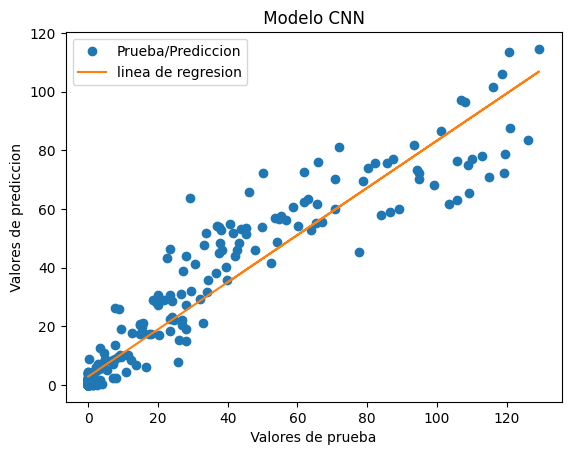

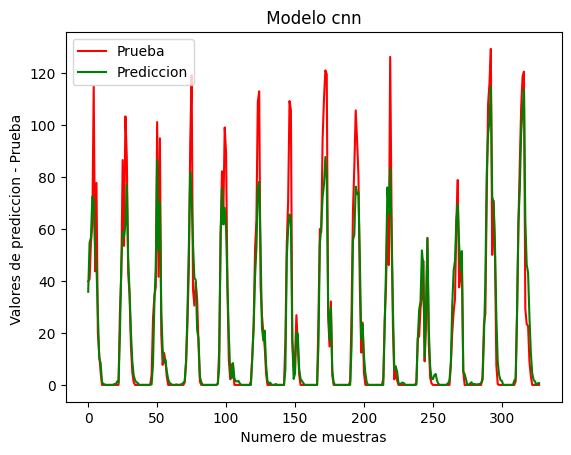

In [125]:
# Obtención de las métricas, Scatter plot y grafico temporal para CNN
# Las métricas seran: MAE, MSE y r^2
from sklearn import metrics
import matplotlib.pyplot as plt

mtrc = {
    'MAE': lambda y_true, y_pred: metrics.mean_absolute_error(y_true, y_pred), 
    'MSE': lambda y_true, y_pred: metrics.mean_squared_error(y_true, y_pred),
    'r2': lambda y_true, y_pred: metrics.r2_score(y_true, y_pred)
}


MAE_CNN = mtrc['MAE'](y_test, y_pred_cnn)

MSE_CNN = mtrc['MSE'](y_test, y_pred_cnn)

r2_CNN = mtrc['r2'](y_test, y_pred_cnn)


## cnn
#Sscatterplot
plt.plot( y_test, y_pred_cnn , 'o')  # Visualizacion del valor predecido y del valorde test
# Obtencion de la línea de regresión del scatterplot (pendiente e intercepto)
m, b = np.polyfit(y_test, y_pred_cnn, 1)
#La siguiente línea de código añade la línea de regresión lineal al scatterplot 
plt.plot(y_test, m*y_test+b)
plt.xlabel(' Valores de prueba ')   
plt.ylabel(' Valores de prediccion ') 
plt.title(' Modelo CNN ')
plt.legend (["Prueba/Prediccion", "linea de regresion"], loc="best", facecolor="w", fontsize=10)         
plt.show()

#Predicción temporal
plt.plot(y_test ,c='r')
plt.plot(y_pred_cnn ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo cnn ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()


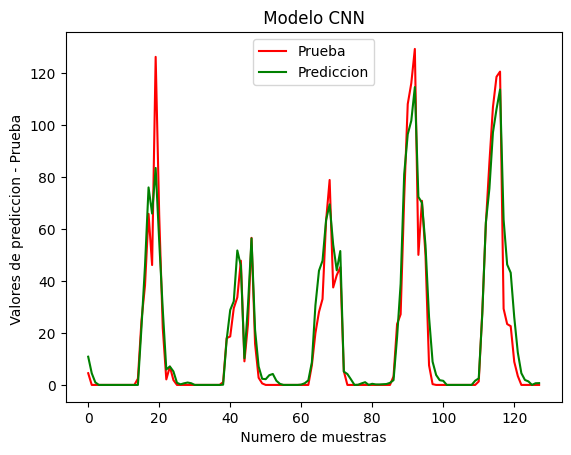

In [126]:
y_test_par = y_test[200:1400]
y_pred_cnn_par = y_pred_cnn[200:1400]


#Predicción temporal
plt.plot(y_test_par ,c='r')
plt.plot(y_pred_cnn_par ,c='g')
plt.xlabel(' Numero de muestras ')   
plt.ylabel(' Valores de prediccion - Prueba  ') 
plt.title(' Modelo CNN ')
plt.legend (["Prueba", "Prediccion"], loc="best", facecolor="w", fontsize=10)               
plt.show()

In [127]:
print(f'MAE: {MAE_CNN}')
print(f'MSE: {MSE_CNN}')
print(f'r2: {r2_CNN}')

MAE: 5.207850458978531
MSE: 108.9381250566122
r2: 0.8997007240614942
